<a href="https://colab.research.google.com/github/valya1/DataMining/blob/master/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import os
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Вторая оценка')

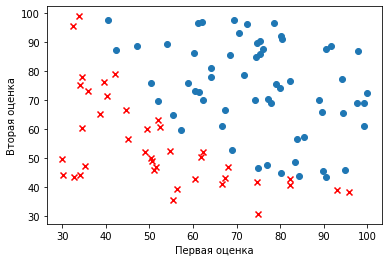

In [ ]:
# соединение в вид[[1, X0, X1], [...]]
data = np.loadtxt('ex2data1.txt', delimiter=',')
#оценки и значение (сдал - не сдал)
old_X, y = data[:, :2], data[:, 2]


def not_passed(arr):
  return arr[2] == 0

def passed(arr):
  return arr[2] == 1


negatives = np.asarray(list(filter(not_passed, data)))
positives = np.asarray(list(filter(passed, data)))

f, ax = plt.subplots()
ax.scatter(negatives[:, 0], negatives[:,1], marker='x',c='red')
ax.scatter(positives[:, 0], positives[:,1], marker='o')
ax.set_xlabel('Первая оценка')
ax.set_ylabel('Вторая оценка')

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
data = data = np.loadtxt('ex2data1.txt', delimiter=',')
X, y = data[:, :2], data[:, 2]
test_sizes = np.arange(0.4, 0.05, -0.05)
acc_scores = []
prec_scores = []
recall_scores = []
f1_scores = []

for test_size in test_sizes:
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state = 0)
  gnb = GaussianNB()
  y_pred = gnb.fit(X_train, Y_train).predict(X_test)
  print("Number of mislabeled points out of a total %d points : %d, correlation train/test:  %d/%d" % (X_test.shape[0], (Y_test != y_pred).sum(), round(1 - test_size, 2) * 100, test_size * 100))
  acc_scores.append(accuracy_score(Y_test, y_pred))
  prec_scores.append(precision_score(Y_test, y_pred))
  recall_scores.append(recall_score(Y_test, y_pred))
  f1_scores.append(f1_score(Y_test, y_pred))

Number of mislabeled points out of a total 40 points : 3, correlation train/test:  60/40
Number of mislabeled points out of a total 35 points : 4, correlation train/test:  65/35
Number of mislabeled points out of a total 31 points : 3, correlation train/test:  70/30
Number of mislabeled points out of a total 26 points : 2, correlation train/test:  75/25
Number of mislabeled points out of a total 21 points : 3, correlation train/test:  80/20
Number of mislabeled points out of a total 16 points : 3, correlation train/test:  85/15
Number of mislabeled points out of a total 11 points : 2, correlation train/test:  90/10


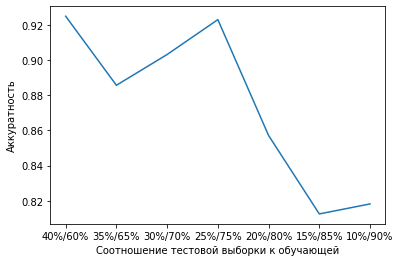

In [ ]:
# fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex = True, sharey = True, figsize = (5,15))

fig, ax1 = plt.subplots()
ax1.set_xlabel('Соотношение тестовой выборки к обучающей')
ax1.set_ylabel('Аккуратность')

ax1.plot(["{}%/{}%".format(int(size * 100), int((round(1-size, 2))*100)) for size in test_sizes], acc_scores)

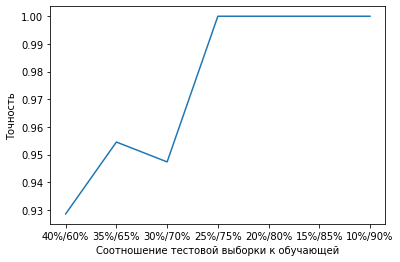

In [ ]:
fig, ax2 = plt.subplots()
ax2.set_xlabel('Соотношение тестовой выборки к обучающей')
ax2.set_ylabel('Точность')
ax2.plot(["{}%/{}%".format(int(size * 100), int((round(1-size, 2))*100)) for size in test_sizes], prec_scores)

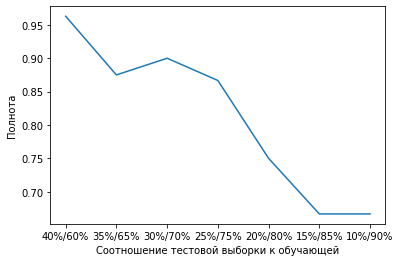

In [ ]:
fig, ax2 = plt.subplots()
ax2.set_xlabel('Соотношение тестовой выборки к обучающей')
ax2.set_ylabel('Полнота')
ax2.plot(["{}%/{}%".format(int(size * 100), int((round(1-size, 2))*100)) for size in test_sizes], recall_scores)

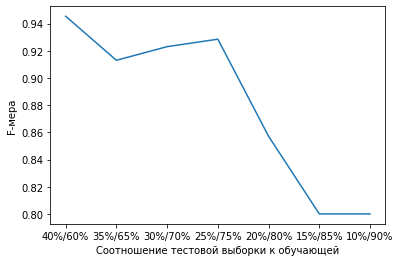

In [ ]:
fig, ax2 = plt.subplots()
ax2.set_xlabel('Соотношение тестовой выборки к обучающей')
ax2.set_ylabel('F-мера')
ax2.plot(["{}%/{}%".format(int(size * 100), int((round(1-size, 2))*100)) for size in test_sizes], f1_scores)